In [1]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *
from lyap_obj import *

In [2]:
# Initial conditions (alpha0) and Jacobi interval
alpha0 = 50/384400 # initial guess for alpha

# C = 2U(r) - (vx^2 + vy^2)
C_range = [3.1370, 3.1493]

In [3]:
fL1 = Family(XL1, muEM)
fL1.find_family(alpha0, 40)

In [4]:
fL2 = Family(XL2, muEM)
fL2.find_family(alpha0, 40)

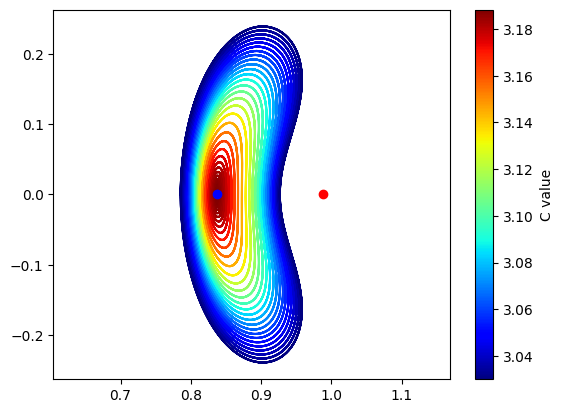

In [5]:
fL1.plot_family()
#fL2.plot_family()

In [6]:
# Obtain two orbits in [C_range[0]  C_range[1]] in L1
orbsL1 = find_Crange(fL1, 2, C_range, verbose=True)

Found 1 orbits in the range, PACing to find more
Found orbit 1
ds: 0.01, C_guess: 3.1422696744783893, G_guess: 5.476330919737421e-13


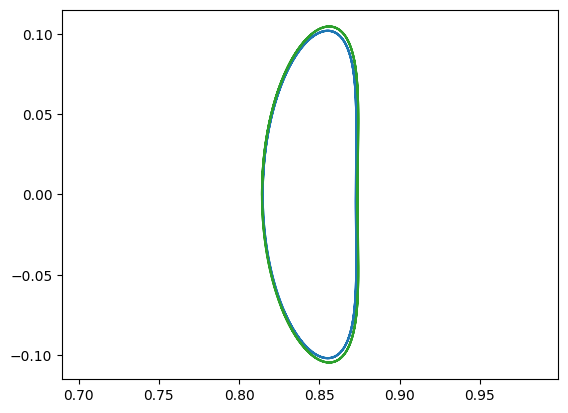

In [7]:
for orbit in orbsL1:
    orbit.plot()
plt.axis('equal')
plt.show()

In [8]:
# Find isoenergetic L2 orbits
isoC_L2 = []
for oL1 in orbsL1:
    isoC_L2.append(find_isoC(oL1, fL2, verbose=True)) 

Finding orbits with C = 3.1443992162204353
Orbit not in the C tolerance. C = 3.1433196599646114, err = 0.0010795562558238991, ds = 0.031947999937062266, G = 8.331699617969406e-13
Orbit not in the C tolerance. C = 3.1493193248151883, err = 0.004920108594753003, ds = -0.02904363630642024, G = 7.875477799008922e-13
Orbit not in the C tolerance. C = 3.143834479639619, err = 0.0005647365808161275, ds = 0.026403305733109308, G = 9.328671161431607e-13
Orbit not in the C tolerance. C = 3.1487985219467762, err = 0.004399305726340952, ds = -0.02400300521191755, G = 9.897267102174298e-13
Orbit not in the C tolerance. C = 3.1442650029547394, err = 0.00013421326569584835, ds = 0.021820913829015954, G = 7.902185644224434e-13
Orbit not in the C tolerance. C = 3.1483709929316586, err = 0.003971776711223285, ds = -0.019837194390014502, G = 8.209064130835645e-13
Orbit not in the C tolerance. C = 3.144624193000467, err = 0.00022497678003174926, ds = 0.018033813081831364, G = 8.91800706304798e-13
Orbit no

In [10]:
out_folder = 'out/'
for i in range(len(isoC_L2)):
    orbsL1[i].save(out_folder + 'L1_' + str(i) + '.npz')
    isoC_L2[i].save(out_folder + 'L2_' + str(i) + '.npz')
    